In [5]:
import pandas as pd
import numpy as np
import yfinance as yf


In [645]:
def binomial_price(T,n,r,s_0,k,type,instrument, params =False,sigma =1,mu=0,u=1,d=1):
    """"
    binomial option pricing w/ N steps for time period T 
    ----------------
    Type: str
    c or p
    ----------------
    Instrument: str
    european or american 
    ----------------
    returns np.array of option price at each times step
    """
    dt = T/n # time delta

    if params == True:
        u = np.exp(mu*dt + sigma*np.sqrt(dt))
        d = np.exp(mu*dt - sigma*np.sqrt(dt))
    else:
        pass
    
    q =((1 +r*dt) - d) /(u-d) #risk free probability
    discount = (1+r*dt)**-1 #discount factor
    price = s_0* d **(np.arange(n,-1,-1)) * u ** (np.arange(0,n+1,1))
    option_p = np.zeros(n+1)

    #pay offs
    for i in range(0,n+1):
        if type == 'c': #if call then max{S-K,0}
            option_p[i] = max(price[i]-k,0)
        else: #         #if put then max{k-S,0}
            option_p[i] = max(k-price[i],0)
    for i in np.arange(n-1,-1,-1): #from the n-1 time to -1 (python indexing, so zero, by one time step)

        s_node = s_0* d **(np.arange(i,-1,-1)) * u ** (np.arange(0,i+1,1)) #prices at everytime step
        option_p[0:i+1] = discount*(q*option_p[1:i+2] + (1-q)*option_p[0:i+1]) #discounts back
        option_p =option_p[:-1]
        
        if instrument == 'european': #if european then discount is the the price
            pass
        elif instrument == 'american': #if american, then at every time max(pay off, stock-k)
            if type == 'c':
                option_p = np.maximum(option_p,s_node-k)
                # if i <10:
                    # print(f"Time {i} {type} Early Exercise:", option_p > (s_node -k)) #print exercise decisions in the first 10 periods
            else:
                option_p = np.maximum(option_p,k-s_node)
                # if i < 10:
                    # print(f"Time {i} {type} Early Exercise:", option_p > (s_node -k))
    return option_p

### Problem 1: American options with N large

Note: This problem is a continuation of Problem 3 in HW #3. The objective is to
generalize your code to American options. Please provide the answers to the questions
below as well as a sample of your code.

We consider the same market model as in Problem 3 of HW #3. We consider an
American put option with strike price $K = 1025$ and maturity $T = 1$ year.

#### (a) Find the price of the option at time $t_0 = 0$ if it is American and compare with the price of the European put found in Problem 1.


In [432]:
call_american = binomial_price(type='c',k = 1025,T = 1,instrument = 'american',n=60,u = 1+.005,d = 1-.003,s_0 = 1000,r = .05)[0]
put_american = binomial_price(type='p',k = 1025,T = 1,instrument = 'american',n=60,u = 1+.005,d = 1-.003,s_0 = 1000,r = .05)[0]
call_euro = binomial_price(type='c',k = 1025,T = 1,instrument = 'european',n=60,u = 1+.005,d = 1-.003,s_0 = 1000,r = .05)[0]
put_euro = binomial_price(type='p',k = 1025,T = 1,instrument = 'european',n=60,u = 1+.005,d = 1-.003,s_0 = 1000,r = .05)[0]

Time 9 c Early Exercise: [ True  True  True  True  True  True  True  True  True  True]
Time 8 c Early Exercise: [ True  True  True  True  True  True  True  True  True]
Time 7 c Early Exercise: [ True  True  True  True  True  True  True  True]
Time 6 c Early Exercise: [ True  True  True  True  True  True  True]
Time 5 c Early Exercise: [ True  True  True  True  True  True]
Time 4 c Early Exercise: [ True  True  True  True  True]
Time 3 c Early Exercise: [ True  True  True  True]
Time 2 c Early Exercise: [ True  True  True]
Time 1 c Early Exercise: [ True  True]
Time 0 c Early Exercise: [ True]
Time 9 p Early Exercise: [ True  True  True  True  True  True  True False False False]
Time 8 p Early Exercise: [ True  True  True  True  True  True  True False False]
Time 7 p Early Exercise: [ True  True  True  True  True  True  True False]
Time 6 p Early Exercise: [ True  True  True  True  True  True False]
Time 5 p Early Exercise: [ True  True  True  True  True  True]
Time 4 p Early Exercise: 

In [434]:
assert call_american == call_euro
assert put_american > put_euro

print(f'Euro @ Zero Rate Put: ${put_euro.round(3)}')
print(f'American @ Zero Rate Put: ${put_american.round(3)}')
print(f'Is american put price equal to euro: {put_american == put_euro}')

Euro @ Zero Rate Put: $3.567
American @ Zero Rate Put: $25.0
Is american put price equal to euro: False



#### (b) What is the earliest possible time of optimal exercise of the American put ?


In [435]:
put_american = binomial_price(type='p',k = 1025,T = 1,instrument = 'american',n=60,u = 1+.005,d = 1-.003,s_0 = 1000,r = .05)[0]
print('\nTime 6 is the earliest time to exercise')

Time 9 p Early Exercise: [ True  True  True  True  True  True  True False False False]
Time 8 p Early Exercise: [ True  True  True  True  True  True  True False False]
Time 7 p Early Exercise: [ True  True  True  True  True  True  True False]
Time 6 p Early Exercise: [ True  True  True  True  True  True False]
Time 5 p Early Exercise: [ True  True  True  True  True  True]
Time 4 p Early Exercise: [ True  True  True  True  True]
Time 3 p Early Exercise: [ True  True  True  True]
Time 2 p Early Exercise: [ True  True  True]
Time 1 p Early Exercise: [ True  True]
Time 0 p Early Exercise: [ True]

Time 6 is the earliest time to exercise



#### (c) Repeat questions (a) and (b) in the case where $r = 0$. What do you conclude ?

In [436]:
put_american_r0 = binomial_price(type='p',k = 1025,T = 1,instrument = 'american',n=60,u = 1+.005,d = 1-.003,s_0 = 1000,r = 0)[0]
call_euro_r0 = binomial_price(type='c',k = 1025,T = 1,instrument = 'european',n=60,u = 1+.005,d = 1-.003,s_0 = 1000,r = 0)[0]
put_euro_r0 = binomial_price(type='p',k = 1025,T = 1,instrument = 'european',n=60,u = 1+.005,d = 1-.003,s_0 = 1000,r = 0)[0]
print('\nTime 7 is the earliest time to exercise')

Time 9 p Early Exercise: [ True  True  True  True  True  True  True  True False False]
Time 8 p Early Exercise: [ True  True  True  True  True  True  True  True False]
Time 7 p Early Exercise: [ True  True  True  True  True  True  True False]
Time 6 p Early Exercise: [ True  True  True  True  True  True  True]
Time 5 p Early Exercise: [ True  True  True  True  True  True]
Time 4 p Early Exercise: [ True  True  True  True  True]
Time 3 p Early Exercise: [ True  True  True  True]
Time 2 p Early Exercise: [ True  True  True]
Time 1 p Early Exercise: [ True  True]
Time 0 p Early Exercise: [ True]

Time 7 is the earliest time to exercise


In [566]:
print(f'Euro @ Zero Rate Put: ${put_euro_r0.round(3)}')
print(f'American @ Zero Rate Put: ${put_american_r0.round(3)}')
print(f'Is american put price equal to euro: {put_american_r0 == put_american_r0}')

Euro @ Zero Rate Put: $28.602
American @ Zero Rate Put: $28.602
Is american put price equal to euro: True


### Problem 2: Option pricing from real data

Note: This problem is the continuation of Prob. 3 in HW #1. We will use the data to
price options and compare with the market prices.

Consider the asset that you selected in HW #1. For this asset, select three call options
and one put option. All options should have approximately the same expiration date, say
about 3 months in the future. The three calls should have three different strike prices,
typically one in-the-money, one at-the-money and one out-of-the-money. (Consider values
relatively close to the current price and, if you have access to this information, for which
the trading volume is relatively large.) The put option should be at-the-money. Record
the current price of these options. Note that all traded options are American options. Also
determine the interest rate to be used for your calculations: typically, you can consider
the LIBOR rate, or the 10-year US treasury yield.


In [567]:
import matplotlib.pyplot as plt 
visa = yf.Ticker('V')
v_historical = yf.download('V',start = '2021-01-01', end = '2022-03-03' ).drop(['Open','High','Low','Close'],axis = 1)

[*********************100%***********************]  1 of 1 completed


In [693]:
current_price = v_historical['Adj Close'][-1]
print(f'Current Price: ${round(current_price,3)}')

Current Price: $208.48


In [256]:
import datetime
from dateutil.relativedelta import relativedelta

def closest_expire_calc(time_delta):
    """
    takes how many months in the future
    ----------------
    returns the closest expire date in future
    """
    target_date = datetime.datetime.today()+relativedelta(months=time_delta)
    dt_expire=[pd.to_datetime(i) for i in visa.options]
    time_diff= []
    for i in range(len(dt_expire)):
        time_diff.append(abs(dt_expire[i] - target_date)) #absolute date difference
    min_diff = min(time_diff)
    min_index = time_diff.index(min_diff)
    return (str(dt_expire[min_index].date()))

In [257]:
expiredate_3_months = closest_expire_calc(3)
opts = visa.option_chain(expiredate_3_months)
v_calls = opts.calls
v_puts = opts.puts

In [561]:
r_10y = yf.download('^tnx',start='2022-03-01')
r_10y = np.round(r_10y['Adj Close'][0],3)
r_dec_10y = r_10y/100
print(f'We use the rate (3/3/2022): {r_10y} %')

[*********************100%***********************]  1 of 1 completed
We use the rate (3/3/2022): 1.707 %


In [707]:
"""Select random in/out/at money calls"""
np.random.seed(10)
in_money_c = v_calls[v_calls['strike']==145.0].iloc[0]
out_money_c = v_calls[v_calls['strike']==225].iloc[0]
atm_c = v_calls[v_calls['strike']==210].iloc[0]
print('\t' +'In the Money Call')
print(in_money_c)
print('\t' +'Out the Money Call')
print(out_money_c)
print('\t' +'ATM Call')
print(atm_c)

"""Select ATM Put"""
selected_put = v_puts[v_puts['strike']==210.0].iloc[0]
print('\t' +'Selected Put')
print(selected_put)

	In the Money Call
contractSymbol          V220617C00145000
lastTradeDate        2022-02-09 16:36:19
strike                             145.0
lastPrice                          88.13
bid                                 46.9
ask                                 48.9
change                               0.0
percentChange                        0.0
volume                                86
openInterest                          43
impliedVolatility               0.465093
inTheMoney                          True
contractSize                     REGULAR
currency                             USD
Name: 15, dtype: object
	Out the Money Call
contractSymbol          V220617C00225000
lastTradeDate        2022-03-08 14:56:35
strike                             225.0
lastPrice                           3.15
bid                                  3.0
ask                                 3.35
change                             -0.28
percentChange                  -8.163264
volume                             


#### (a) We assume that the CRR model represents the stock price and that its assumptions are satisfied. Based on historical data (about 3 months to a year in the past), determine the parameters $\mu$ and $\sigma$ for the stock that you chose following the methods discussed in class. (I recommend to download current data, but feel free to use past data if that is all you have.)


$$\hat{\mu} = \frac{1}{M \Delta t} \sum_{k=1} ^M y_k$$
$$\hat{\sigma}^2 = \frac{1}{M \Delta t}\sum_{k=1} ^M(Y_K -E[Y_k])^2 = \frac{1}{M \Delta t}\sum_{k=1} ^M(Y_K -\hat{\mu} \Delta t)^2$$

In [678]:
delta_t = 1/252
v_historical['log_returns'] = np.log(1+(v_historical['Adj Close'].pct_change()))

sigma_v_sq = np.var(v_historical.log_returns.dropna()) / delta_t
sigma_v = np.sqrt(sigma_v_sq)
mu_v = np.mean(v_historical.log_returns.dropna()) /delta_t

print(f'mu: {round(mu_v,4)*100}%')
print(f'sigma: {round(sigma_v,3)*100}%')

mu: -3.09%
sigma: 25.8%


#### (b) Price the selected put option using an N-period binomial model for different values of N (which you can choose on your own). As a hint, you can for instance start with $N = 2$ or $N = 3$, which should be approximately monthly-periods. You can then use approximately weekly periods $(N \approx 10,12)$ or daily periods $(N \approx 60)$. Make sure that you use the exact number of days or weeks to the maturity of your option.


In [681]:
day_to_expiry = pd.to_datetime(expiry) - pd.to_datetime('2022-03-03')
years_to_expiry = float(day_to_expiry.days)/365

In [730]:
price_estimate_v_put =binomial_price(years_to_expiry,60,r=r_dec_10y,s_0=current_price,k=210,type='p', instrument='american',
                    params =True,sigma =sigma_v ,mu=mu_v)[0]
print(f"Price of Visa Put ATM: ${round(price_estimate_v_put,4)}")

Price of Visa Put ATM: $11.954


#### (c) Compare your results to the market price and comment. In particular, discuss the impact of $N$ on your calculated price.

In [668]:
price = []
for i in range(1,60):
    price.append(binomial_price(years_to_expiry,i,r=r_dec_10y,s_0=current_price,k=210,type='p', instrument='american',
                    params =True,sigma =sigma_v ,mu=mu_v)[0])

Text(0.5, 1.0, 'Option price vs. Chosen N')

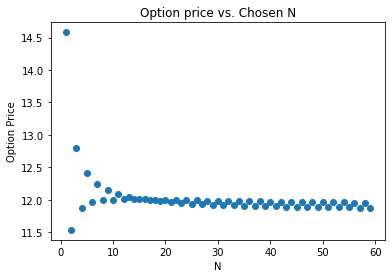

In [669]:
plt.scatter(range(1,len(price)+1),price)
plt.xlabel('N')
plt.ylabel('Option Price')
plt.title('Option price vs. Chosen N')

As we increase the N, the price should converge to the proper value of the option.. clearly converging is occuring but something funny

#### (d) Price each of the three selected call options using all of (i) approximately monthly periods $(N = 2,3)$, (ii) approximately weekly periods $(N \approx 10, 12)$, and (iii) daily periods $(N \approx 60)$.

In [706]:
n = [3,10,60]
calls_strike = [140,225,210]
print('Call Price w/ Various Strikes using different time Partitions \n')
for strike in range(len(calls_strike)):
    for i in range(len(n)):
        price = binomial_price(years_to_expiry,n[i],r=r_dec_10y,s_0=current_price, k=calls_strike[strike] ,type='p', instrument='american',
                    params =True,sigma =sigma_v ,mu=mu_v)[0]
        print(f'N = {n[i]}, Strike:{[calls_strike[strike]]}: ${round(price,4)}')

Call Price w/ Various Strikes using different time Partitions 

N = 3, Strike:[140]: $0.0
N = 10, Strike:[140]: $0.0062
N = 60, Strike:[140]: $0.0118
N = 3, Strike:[225]: $20.842
N = 10, Strike:[225]: $21.219
N = 60, Strike:[225]: $21.4466
N = 3, Strike:[210]: $12.7916
N = 10, Strike:[210]: $12.0034
N = 60, Strike:[210]: $11.954


#### (e) Compare your results to the market prices and comment. In particular, discuss the impact of the strike price K on your results.

Given the volitility in this current market, this pricing machine will not be that accurate as it doesn't price in sentiment toward this market segment (tech), nor on-going sanctions of Visa (V) in respect to the conflict in east Europe. The market prices do reflect sentiments. Hence we see a stark difference in prices.

### Problem 3

We consider an N-period binomial model with the following properties: each period lasts
a year and the current stock price is $S_0 = 4$. On each period, the stock price doubles
when it moves up and is reduced by half when it moves down. The annual interest rate
on the money market is 25%.


In [297]:
p_3_u = 2
p_3_d =.5
s_0 = 4
r = .25


#### (a) Find the values of $\mu$ and $\sigma$ associated with this CRR model


In [708]:
dt = 1/252
mu = (np.log(2) + np.log(1-p_3_d)) / (2*dt)
sigma = (np.log(2) - mu*dt) / (np.sqrt(dt))
print(f'mu: {mu}')
print(f'sigma: {sigma}')

mu: 0.0
sigma: 11.003370370363198


#### (b) Assuming that $p=\frac{1}{2}$ , find $P(S_T \geq 6)$ when $N = 3$ and $N = 10$

In [313]:
import math
n_3 = 3
n_10 = 10
p=.5
price_10 = s_0* p_3_d **(np.arange(n_10,-1,-1)) * p_3_u ** (np.arange(0,n_10+1,1))
price_3 = s_0* p_3_d **(np.arange(n_3,-1,-1)) * p_3_u ** (np.arange(0,n_3+1,1))

In [721]:
def prob_price_greater_than_calc(n_t, price_level):
    """
    takes the time point and a price level
    --------
    Returns P(S_T >= price_level)
    """
    prices = s_0* p_3_d **(np.arange(n_t,-1,-1)) * p_3_u ** (np.arange(0,n_t+1,1)) #calc all the prices
    idx = [i for i,v in enumerate(prices) if v > price_level] #get the index of s_t that are greater then price_level
    answer = 0
    for i in idx:
        answer += math.comb(n_t,i) *(.5)**n_t
    return answer

In [722]:
p_4_n10 = prob_price_greater_than_calc(10, 6)
p_4_n3 = prob_price_greater_than_calc(3, 6)
print(f'N=10: P(S_T > 6 ) = {round(p_4_n10,4)}')
print(f'N=3: P(S_T > 6 ) = {round(p_4_n3,4)}')

N=10: P(S_T > 6 ) = 0.377
N=3: P(S_T > 6 ) = 0.5



#### (c) Using the risk-neutral option pricing formula (written as an expectation), calculate the price of a European call with strike price $K = 8$ when $N = 3$ and $N = 10$

In [709]:
def prices_t(t,s_0,p_d,p_u):
    """
    Given time period, inital stock price, up and down movement
    --------
    Returns all posible prices at the given time period
    """
    return s_0* p_d **(np.arange(t,-1,-1)) * p_u ** (np.arange(0,t+1,1)) #calc all the prices


In [719]:
print('Prices at  t = 3')
prices_t(3,s_0 =4,p_d=p_3_d,p_u = p_3_u)

Prices at  t = 3


array([ 0.5,  2. ,  8. , 32. ])

In [720]:
print('Prices at  t = 10')
prices_t(10,s_0 =4,p_d=p_3_d,p_u = p_3_u)

Prices at  t = 10


array([3.90625e-03, 1.56250e-02, 6.25000e-02, 2.50000e-01, 1.00000e+00,
       4.00000e+00, 1.60000e+01, 6.40000e+01, 2.56000e+02, 1.02400e+03,
       4.09600e+03])

$N=3$
$$F_0 = PV E_Q[max\{0,S_3-K\}] = \frac{1}{(1+.25)^3} E_Q[max\{0,S_3-8\}] = $$
$$ PV(E_Q[max\{0,S_3-8\}|S_3 \geq 8] Q(S_3 \geq 8) +E_Q[max\{0,S_3-8\}|S_3 \leq 8] Q(S_3 \leq 8))=$$

If $S_3 < 8,$ then the the value is zero and the right part of the equation is zero. Hence,
$$PV(E_Q[S_3-8|S_3 \geq 8] Q(S_3 \geq 8)) = PV((E_Q[S_3|S_3 \geq 8] - 8) Q(S_3 \geq 8))$$

Given the random variable $S_3$, we can produce the sample space with the assumptions given: $\{.5,2,8,32\}$ (via pricing_t function)

Now we evaluate the conditional expectation for each element in the sample space:

$$F_0 = PV(((8\frac{3}{8} + 32\frac{1}{8})*2-8)Q(S_3 \geq 8))=\frac{1}{1.25^3}(6*.5) =1.536$$
Price of the call when $N =3$ is $ \$1.536$

$N=10$
$$F_0 = PV E_Q[max\{0,S_{10}-K\}] = \frac{1}{(1+.25)^10} E_Q[max\{0,S_{10}-8\}]=$$
$$PV(E_Q[max\{0,S_{10}-8\}|S_{10} \geq 8] Q(S_{10} \geq 8) +E_Q[max\{0,S_{10}-8\}|S_{10} \leq 8] Q(S_{10} \leq 8))=$$
If $S_{10} < 8,$ then the the value is zero and the right part of the equation is zero. Hence,
$$PV(E_Q[S_{10}-8|S_{10} \geq 8] Q(S_{10} \geq 8)) = PV((E_Q[S_{10}|S_{10} \geq 8]-8 )Q(S_{10} \geq 8))$$

Given the random variable $S_{10}$, we can produce the sample space with the assumptions given via pricing_t function above and see 5 values (1.60000e+01, 6.40000e+01, 2.56000e+02, 1.02400e+03, 4.09600e+03) are above the strike $K$. Using the combinatorics in prob_price_greater_than_calc above, we have:

$$ PV(((\frac{\sum_{i=6}^{10}{10 \choose i}(.5)^{10} }{.377})-8) Q(S_{10} \geq 8) = PV(((\frac{16{10 \choose 6}(.5)^{10}+64{10 \choose 7}(.5)^{10}+256{10 \choose 8}(.5)^{10}+1024{10 \choose 9}(.5)^{10}+4096{10 \choose 10}(.5)^{10} }{.377}) -8)Q(S_{10} \geq 8) = $$

With the help of a mighty calculator,
$$\frac{1}{1.25^{10}}(\frac{36.0313}{.377}-8)(.377) = 3.545$$

In [729]:
pm_3 = binomial_price(type='c',k = 8,T = 3,instrument = 'european',n=3,u = 2,d = .5,s_0 = 4,r = .25)[0]
print(f'Pricing Machine for Problem C @ N=3: ${round(pm_3,4)}')
pm_10 = binomial_price(type='c',k = 8,T = 10,instrument = 'european',n=10,u = 2,d = .5,s_0 = 4,r = .25)[0]
print(f'Pricing Machine for Problem C @ N=10: ${round(pm_10,4)}')

Pricing Machine for Problem C @ N=3: $1.536
Pricing Machine for Problem C @ N=10: $3.545
